# 1. Importing necessary lib
---
The following library are needed:
1. Keras
2. Numpy

In [1]:
from keras.datasets import reuters
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    """ Instead of this function keras.utils.np_utils.to_categorical() can be used.
    """
    
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=7,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/7
16/16 [==============================] - 1s 32ms/step - loss: 0.1346 - acc: 0.9548 - val_loss: 1.0681 - val_acc: 0.8000
Epoch 2/7
16/16 [==============================] - 0s 17ms/step - loss: 0.1066 - acc: 0.9582 - val_loss: 1.0883 - val_acc: 0.8020
Epoch 3/7
16/16 [==============================] - 0s 20ms/step - loss: 0.1057 - acc: 0.9569 - val_loss: 1.1797 - val_acc: 0.7830
Epoch 4/7
16/16 [==============================] - 0s 18ms/step - loss: 0.1015 - acc: 0.9583 - val_loss: 1.1579 - val_acc: 0.8030
Epoch 5/7
16/16 [==============================] - 0s 17ms/step - loss: 0.1002 - acc: 0.9594 - val_loss: 1.1187 - val_acc: 0.7950
Epoch 6/7
16/16 [==============================] - 0s 17ms/step - loss: 0.0994 - acc: 0.9579 - val_loss: 1.1798 - val_acc: 0.7940
Epoch 7/7
16/16 [==============================] - 0s 21ms/step - loss: 0.0968 - acc: 0.9590 - val_loss: 1.1694 - val_acc: 0.7970


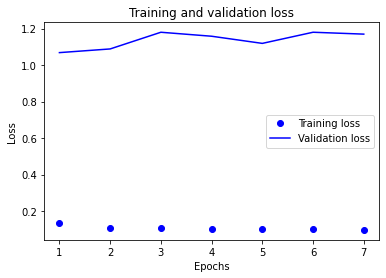

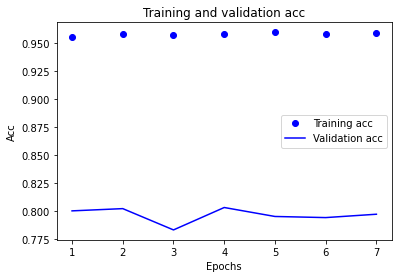

In [12]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [13]:
results = model.evaluate(x_test, one_hot_test_labels)
print(f"Accuracy: {results[1] * 100}%")

71/71 [==============================] - 0s 4ms/step - loss: 1.3978 - acc: 0.7769
Accuracy: 77.69367694854736%


# 2. Hyperparameter comparison
---

In [20]:
def create_model(layer=2,neurons=64):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_shape=(10000,)))
    for i in range(layer-1):
        model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    return model

## 2.1 Implementing a bottleneck

Using a layer with 4 neurons in the middle of the system will act as a bottleneck of the implementation. The performances decreases.

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 3.4661 - acc: 0.2923 - val_loss: 3.0922 - val_acc: 0.2560
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.7944 - acc: 0.2885 - val_loss: 2.6092 - val_acc: 0.3320
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 2.3613 - acc: 0.3399 - val_loss: 2.2880 - val_acc: 0.3390
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.9868 - acc: 0.3484 - val_loss: 1.9409 - val_acc: 0.3390
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5371 - acc: 0.4786 - val_loss: 1.4835 - val_acc: 0.6220
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2053 - acc: 0.6501 - val_loss: 1.4043 - val_acc: 0.6410
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1046 - acc: 0.6744 - val_loss: 1.3840 - val_acc: 0.6680
Epoch 8/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0302 - acc:

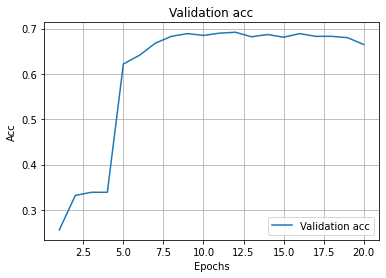

71/71 [==============================] - 0s 5ms/step - loss: 2.3250 - acc: 0.6563
Accuracy: 65.62778353691101%


In [18]:

model_test = models.Sequential()

model_test.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_test.add(layers.Dense(4, activation='relu')) # Bottle neck
model_test.add(layers.Dense(46, activation='softmax'))

model_test.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['acc'])

history_test = model_test.fit(partial_x_train,
                partial_y_train,
                epochs=20,
                batch_size=128,
                validation_data=(x_val,y_val))

history_dict_test = history_test.history
loss_values = history_dict_test['loss']
val_loss_values = history_dict_test['val_loss']

acc_values = history_dict_test['acc']
val_acc_values = history_dict_test['val_acc']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_acc_values, label=f'Validation acc')

plt.grid()
plt.title('Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

results = model_test.evaluate(x_test, one_hot_test_labels)
print(f"Accuracy: {results[1] * 100}%")

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 2.1557 - acc: 0.5702 - val_loss: 1.4472 - val_acc: 0.6680
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2015 - acc: 0.7306 - val_loss: 1.1679 - val_acc: 0.7330
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9000 - acc: 0.7924 - val_loss: 1.0348 - val_acc: 0.7700
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6940 - acc: 0.8450 - val_loss: 0.9764 - val_acc: 0.7980
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5384 - acc: 0.8815 - val_loss: 0.9463 - val_acc: 0.8030
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.4227 - acc: 0.9069 - val_loss: 0.9096 - val_acc: 0.8100
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.3366 - acc: 0.9266 - val_loss: 0.9280 - val_acc: 0.8050
Epoch 8/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2763 - acc: 0.9

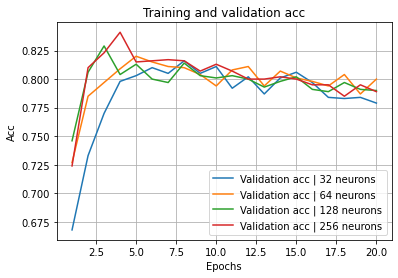

In [21]:
model_list = []
for neurons in [32,64,128,256]:

    model_test = create_model(layer=2,neurons=neurons)
    model_test.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

    history_test = model_test.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val,y_val))

    history_dict_test = history_test.history
    loss_values = history_dict_test['loss']
    val_loss_values = history_dict_test['val_loss']

    acc_values = history_dict_test['acc']
    val_acc_values = history_dict_test['val_acc']

    plt.plot(epochs, val_acc_values, label=f'Validation acc | {neurons} neurons')

plt.grid()
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 1.8503 - acc: 0.6422 - val_loss: 1.2224 - val_acc: 0.7210
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9359 - acc: 0.8046 - val_loss: 0.9677 - val_acc: 0.8040
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6311 - acc: 0.8715 - val_loss: 0.8444 - val_acc: 0.8320
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.4493 - acc: 0.9077 - val_loss: 0.8039 - val_acc: 0.8310
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 0.3349 - acc: 0.9285 - val_loss: 0.8079 - val_acc: 0.8230
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2613 - acc: 0.9406 - val_loss: 0.8293 - val_acc: 0.8390
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.2146 - acc: 0.9474 - val_loss: 0.8227 - val_acc: 0.8340
Epoch 8/20
63/63 [==============================] - 1s 9ms/step - loss: 0.1822 - acc: 

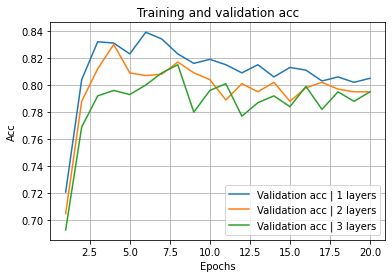

In [22]:
model_list = []
for l in [1,2,3]:

    model_test = create_model(layer=l,neurons=64)
    model_test.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

    history_test = model_test.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val,y_val))

    history_dict_test = history_test.history
    loss_values = history_dict_test['loss']
    val_loss_values = history_dict_test['val_loss']

    acc_values = history_dict_test['acc']
    val_acc_values = history_dict_test['val_acc']

    plt.plot(epochs, val_acc_values, label=f'Validation acc | {l} layers')

plt.grid()
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()